1.We will use acoustic features to distinguish a male voice from a female. 

Load the dataset from “voice.csv”,identify the target variable and do a one-hot encoding for the same. Split the dataset intotrain-test with 20% of the data kept aside for testing.[Hint: Refer to LabelEncoder documentation in scikit-learn]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
voice=pd.read_csv('voice.csv')

In [4]:
voice.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male


In [5]:
x=voice.iloc[:,:-1]
y=voice.iloc[:,-1]

In [6]:
y.unique()

array(['male', 'female'], dtype=object)

In [11]:
y.dtype

dtype('O')

In [7]:
y_new=y.map({'male':0,'female':1})

In [12]:
y_new.dtype

dtype('int64')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,accuracy_score

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y_new,test_size=0.2,random_state=85)

2.Fit a logistic regression model and measure the accuracy ofthe test set.[Hint:Refer to Linear Models section in scikit-learn]

In [17]:
lr=LogisticRegression(max_iter=1000)

In [18]:
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [19]:
pred=lr.predict(X_test)

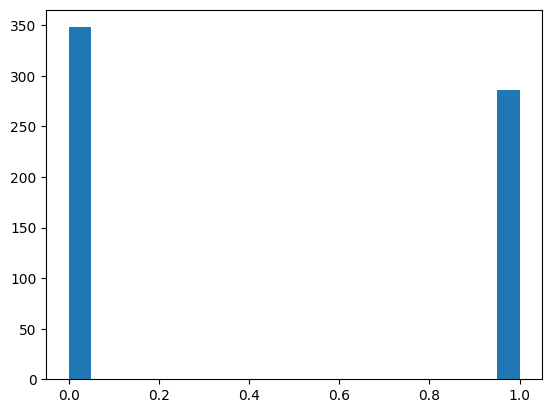

In [25]:
plt.hist(pred,bins=20)
plt.show()
#here we can see the data is almost balanced so we will use accuracy score for evaluation

In [28]:
accuracy_score(Y_test,pred# 91% accuracy we are getting which is correct

0.9148264984227129

In [31]:
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

3.Compute the correlation matrix that describes the dependence between all predictors and identifiesthe highly correlated predictors.  Plot the correlation matrix using a seaborn heatmap.[Hint: Explore dataframe methods to identify appropriate methods]

In [39]:
type(x)

pandas.core.frame.DataFrame

In [40]:
type(y)

pandas.core.series.Series

In [41]:
voice_2=pd.concat([x,y_new],axis=1)

In [46]:
cor_matrix=voice_2.corr()
cor_matrix

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,-0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,-0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,-0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,-0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,-0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,-0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,-0.357499


we can see the highly correlated features are: "meanfun" with "label" the correlation percentage is 83% and rest we can compare with different different features

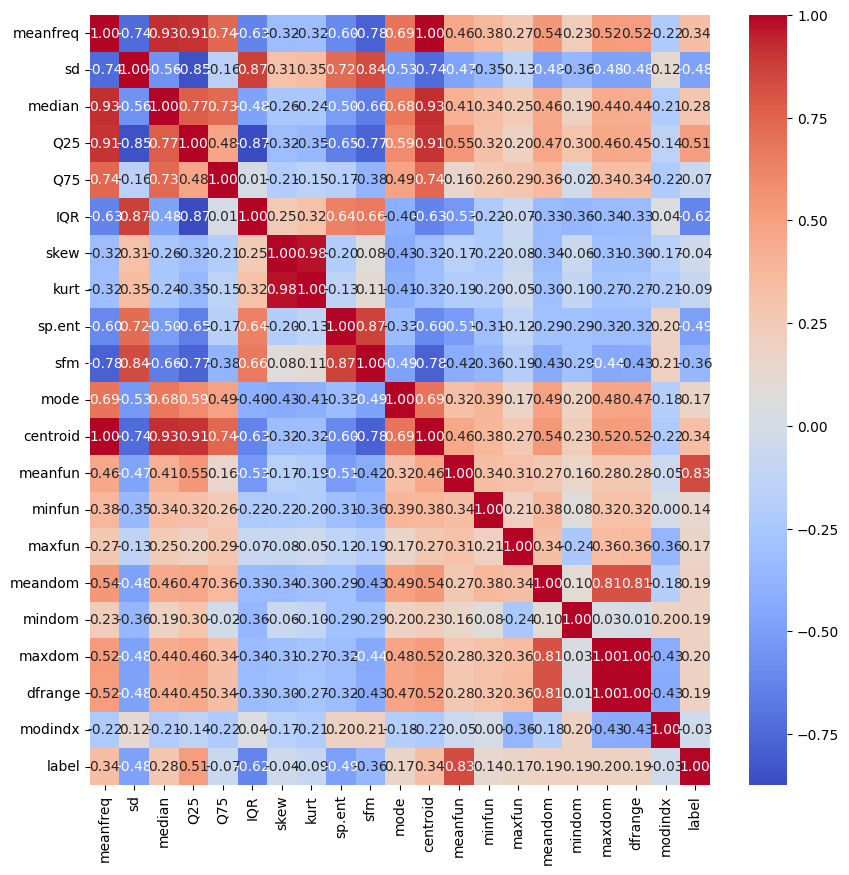

In [45]:
# we can frame this using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor_matrix,annot=True,cmap="coolwarm", fmt=".2f")
plt.show()

Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of the previous model.[Hint:Identify correlatedvariable pairs and remove one among them]

In [57]:
# Find highly correlated pairs
correlation_threshold=0.9
highly_correlated_pairs = []
for i in range(len(cor_matrix.columns)):
    for j in range(i+1, len(cor_matrix.columns)):
        if abs(cor_matrix.iloc[i, j]) > correlation_threshold:
            highly_correlated_pairs.append((cor_matrix.columns[i], cor_matrix.columns[j]))

# Decide which features to keep based on domain knowledge or importance analysis

# Remove highly correlated features from the dataset
features_to_remove = set()
for feature1, feature2 in highly_correlated_pairs:
    # Decide which feature to remove based on some criteria
    # For example, remove the one with lower importance or based on domain knowledge
    features_to_remove.add(feature1)

# Remove the selected features from the dataset
data_filtered = voice_2.drop(columns=features_to_remove)

In [58]:
data_filtered.head(2)

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
0,0.064241,0.090193,0.075122,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,0.000000,0
1,0.067310,0.092666,0.073252,634.613855,0.892193,0.513724,0.0,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.046875,0.052632,0


In [59]:
x1=data_filtered.iloc[:,:-1]
y1=data_filtered.iloc[:,-1]

In [60]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x1,y1,test_size=0.2,random_state=85)

In [61]:
lr_3=LogisticRegression(max_iter=1000)

In [62]:
lr_3.fit(X_train1,Y_train1)

LogisticRegression(max_iter=1000)

In [63]:
predict_2=lr_3.predict(X_test1)

In [64]:
accuracy_score(Y_test,predict_2)

0.9211356466876972